## 其它測試資料

In [9]:

# volume_df = data.get('intraday_trading_stat:當日沖銷交易總成交股數')
# print(volume_df.head())
# print(volume_df.tail())

# data.get('stock_index_vol:成交股數')
# data.get('stock_index_vol:成交筆數')
volume_df = data.get('stock_index_vol:成交筆數')
# print(volume_df.columns)
print(volume_df['上市一般股票'].tail())
print(volume_df['上櫃一般股票'].tail())
print(volume_df['上市ETF'].tail())

volume_df = data.get('price:成交筆數')
print(volume_df['2330'].tail())

chip_df = data.get('institutional_investors_trading_all_market_summary:買賣超')
print(chip_df.tail())

date
2022-03-28    54537.0
2022-03-29    21222.0
2022-03-30    48535.0
2022-03-31    18860.0
2022-04-01    53178.0
Name: 2330, dtype: float64
                    上市合計  上市外資  上市外資及陸資  上市外資及陸資(不含外資自營商)    上市外資自營商  \
date                                                                   
2022-03-28 -1.365239e+10   NaN      NaN     -1.259224e+10 -4996550.0   
2022-03-29 -7.215555e+09   NaN      NaN     -8.311780e+09 -2466230.0   
2022-03-30  2.981006e+10   NaN      NaN      2.202793e+10  8705420.0   
2022-03-31  1.911423e+09   NaN      NaN      2.468588e+09 -9506310.0   
2022-04-01 -9.948918e+09   NaN      NaN     -1.078100e+10 -4707990.0   

                    上市投信  上市自營商   上市自營商(自行買賣)     上市自營商(避險)     上櫃三大法人合計*  \
date                                                                        
2022-03-28 -1.395324e+08    NaN -6.394841e+07 -8.566696e+08 -5.728178e+08   
2022-03-29  1.340264e+09    NaN -4.644206e+07 -1.975972e+08  1.463347e+09   
2022-03-30  2.147817e+09    NaN  3.803191e+09

# Convolutional Neural Network

## Data from finlab official API

In [1]:
from finlab import data
import finlab

finlab.login("tiyybDDkjfj91vIexZCvLwL84ClFRIKE2yQwZBKP/dpT8FMnMdr9dxTKxwt29KjD#free")

輸入成功!


In [2]:
# close_df = data.get('stock_index_price:收盤指數')
# print(close_df.tail())
twii_close_df = data.get('taiex_total_index:收盤指數')

twii_df = twii_close_df.rename(columns={'TAIEX': '台股指數'})
print(twii_df.shape)
print(twii_df.tail())

twii = twii_df['台股指數']
print(twii.tail())

(5767, 1)
                台股指數
date                
2022-04-12  16990.91
2022-04-13  17301.65
2022-04-14  17245.65
2022-04-15  17004.18
2022-04-18  16898.87
date
2022-04-12    16990.91
2022-04-13    17301.65
2022-04-14    17245.65
2022-04-15    17004.18
2022-04-18    16898.87
Name: 台股指數, dtype: float64


## Data from finlab crawler

In [51]:
import pandas as pd
from finlab.data import Data
data = Data()
twii_df = data.get("發行量加權股價指數")  # pandas dataframe
print("len(twii_df): ", len(twii_df))

twii = twii_df['台股指數'] # pandas series
twii = twii.resample('15T').first().dropna()
print("len(twii): ", len(twii))
print(twii.head())

twii_df = pd.DataFrame({'台股指數': twii})
print("len(twii_df): ", len(twii_df))
print(twii_df.head())

len(twii_df):  7178422
len(twii):  75658
date
2006-01-02 09:00:00    6548.34
2006-01-02 09:15:00    6478.09
2006-01-02 09:30:00    6474.88
2006-01-02 09:45:00    6471.12
2006-01-02 10:00:00    6480.50
Name: 台股指數, dtype: float64
len(twii_df):  75658
                        台股指數
date                        
2006-01-02 09:00:00  6548.34
2006-01-02 09:15:00  6478.09
2006-01-02 09:30:00  6474.88
2006-01-02 09:45:00  6471.12
2006-01-02 10:00:00  6480.50


In [3]:
# import datetime
# twii_df_train = twii_df[twii_df.index <datetime.datetime(2016,1,1)]

def train_val_test_split(twii_df):
    total_num = len(twii_df)
    train_num = int(total_num * 0.7)
    validation_num = int(total_num * 0.2)
    test_num = total_num - train_num - validation_num

    train_end_index = train_num
    
    val_start_index = train_end_index
    val_end_index = train_num+validation_num
    
    test_start_index = val_end_index
    
    twii_df_train = twii_df.iloc[:train_end_index]
    twii_df_validation = twii_df.iloc[val_start_index:val_end_index]
    twii_df_test = twii_df.iloc[test_start_index:]

    print("twii_df.iloc[0]: ", twii_df.iloc[0])
    print("twii_df.iloc[-1]: ", twii_df.iloc[-1])
    print()
    
    print("twii_df_train.iloc[0]: ", twii_df_train.iloc[0])
    print("twii_df_train.iloc[-1]: ", twii_df_train.iloc[-1])
    print()
    
    print("twii_df_validation.iloc[0]: ", twii_df_validation.iloc[0])
    print("twii_df_validation.iloc[-1]: ", twii_df_validation.iloc[-1])
    print()
    
    print("twii_df_test.iloc[0]: ", twii_df_test.iloc[0])
    print("twii_df_test.iloc[-1]: ", twii_df_test.iloc[-1])
    print()
    
    print(f"train_start: {0}, train_end: {train_end_index}, val_start:{val_start_index}, val_end:{val_end_index}, test_start:{val_end_index}")
    print("len(twii_df_train): ", len(twii_df_train))
    print("len(twii_df_validation): ", len(twii_df_validation))
    print("len(twii_df_test): ", len(twii_df_test))
    
    print("total number: ", len(twii_df_train)+len(twii_df_validation)+len(twii_df_test))

    return twii_df_train, twii_df_validation, twii_df_test
    
twii_df_train, twii_df_validation, twii_df_test = train_val_test_split(twii_df['台股指數'])

twii_df.iloc[0]:  6152.43
twii_df.iloc[-1]:  16898.87

twii_df_train.iloc[0]:  6152.43
twii_df_train.iloc[-1]:  9736.73

twii_df_validation.iloc[0]:  9749.69
twii_df_validation.iloc[-1]:  11617.08

twii_df_test.iloc[0]:  11489.57
twii_df_test.iloc[-1]:  16898.87

train_start: 0, train_end: 4036, val_start:4036, val_end:5189, test_start:5189
len(twii_df_train):  4036
len(twii_df_validation):  1153
len(twii_df_test):  578
total number:  5767


In [31]:
# investTrust_df = data.get("投信買賣超股數")  # pandas dataframe from 'bargin_report' table
# print("len(investTrust_df): ", len(investTrust_df))
# print(investTrust_df.head())
# print(investTrust_df.tail())


len(investTrust_df):  1237
stock_id        0050  0051  0052  0053  0054      0055       0056  0057  0058  \
date                                                                            
2022-02-21       NaN   NaN   NaN   NaN   NaN       NaN        NaN   NaN   NaN   
2022-02-22       NaN   NaN   NaN   NaN   NaN       NaN  3000000.0   NaN   NaN   
2022-02-23       NaN   NaN   NaN   NaN   NaN       NaN        NaN   NaN   NaN   
2022-02-24   36000.0   NaN   NaN   NaN   NaN   60000.0        NaN   NaN   NaN   
2022-02-25 -500000.0   NaN   NaN   NaN   NaN  100000.0        NaN   NaN   NaN   

stock_id    0059  ...  9944    9945  9946  9949  9950  9951  9955   9958  \
date              ...                                                      
2022-02-21   NaN  ...   NaN  -993.0   NaN   NaN   NaN   NaN   NaN -246.0   
2022-02-22   NaN  ...   NaN     NaN   NaN   NaN   NaN   NaN   NaN    NaN   
2022-02-23   NaN  ...   NaN     NaN   NaN   NaN   NaN   NaN   NaN    NaN   
2022-02-24   NaN  ...   N

## 製作features

In [4]:
import numpy as np
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

def convertDf2CNNData(stockPrice_series, time_period=20, predict_point=5, data_point_day=18, sliding_movement=4):
    # # 1分K，以15分鐘取一次sample，一天4小時30分鐘，所以一天總共會有18筆資料，一個月20個交易日，共360點
    # buy_point = time_period - 1   # 看過去的360點(20天)股價做買入決定，所以剛好在第20天買，但陣列索引從0開始，所以是在360-1=359買入。
    # sell_point = 5 * 18  # 1天18筆資料，假設5天後賣出，就是90筆資料;假設10天後賣出，就是180筆資料
    
    # 日K，所以一天1筆資料，一個月20個交易日，共20點
    # buy_point = time_period - 1   # 看過去的20點(20天)股價做買入決定，所以剛好在第20天買，但陣列索引從0開始，所以是在20-1=19買入。
    # sell_point = 5  # 1天1筆資料，假設5天後賣出，就是5筆資料;假設10天後賣出，就是10筆資料
    
    total_data_point = time_period * data_point_day
    buy_point = (total_data_point) - 1   # 看過去的20點(20天)股價做買入決定，所以剛好在第20天買，但陣列索引從0開始，所以是在20-1=19買入。
    sell_point = predict_point * data_point_day  # 1天1筆資料，假設5天後賣出，就是5筆資料;假設10天後賣出，就是10筆資料
    
    cnn_x = []
    cnn_y = []
    cnn_y_mean = []
    buy_date_indexs = []
    
    finish_point = len(stockPrice_series) - buy_point - sell_point
    for i in tqdm.tqdm_notebook(range(0, finish_point, sliding_movement)): # 因為sliding window如果每次只移動一小格，會造成很多看似一樣的圖，所以改每次移動四個sample point(1小時)。
        s = stockPrice_series.iloc[i:i+total_data_point].values
        # cnn_x.append((s - s.min())/(s.max() - s.min())) # 存成GAF的徒不需要做normalize的動作，GAF本身就會轉了。
        cnn_x.append(s)
        
        sell_point_index = i+buy_point+sell_point
        r = stockPrice_series.iloc[sell_point_index] / stockPrice_series.iloc[i+buy_point] # 在sliding window最後一個時間點決定要買，所以是-1。在10天後決定要賣，所以是+10
        cnn_y.append(r)
        
        next_nDays_df = stockPrice_series.iloc[i+buy_point+1:sell_point_index+1]
        next_nDays_mean = next_nDays_df.mean()
        r_mean = next_nDays_mean / stockPrice_series.iloc[i+buy_point]
        cnn_y_mean.append(r_mean)
        
        buy_date_indexs.append(stockPrice_series.index[i+buy_point])

    cnn_x = np.array(cnn_x)
    cnn_y = np.array(cnn_y)
    cnn_y_mean = np.array(cnn_y_mean)
    buy_date_indexs = np.array(buy_date_indexs)

    plt.plot(cnn_x[0])

    # print(f"cnn_x[0]: {cnn_x[0]}")
    print(f"cnn_y[0]: {cnn_y[0]}")
    print(f"buy_date_indexs[0]: {buy_date_indexs[0]}")

    print(f"cnn_x.shape: {cnn_x.shape}")
    print(f"cnn_y.shape: {cnn_y.shape}")
    print(f"cnn_y_mean.shape: {cnn_y_mean.shape}")
    print(f"buy_date_indexs.shape: {buy_date_indexs.shape}")

    print(f"len(stockPrice_series): {len(stockPrice_series)}")
    print(f"buy_date_indexs[0]: {buy_date_indexs[0]}")
    print(f"buy_date_indexs[-1]: {buy_date_indexs[-1]}")
    
    return cnn_x, cnn_y, cnn_y_mean, buy_date_indexs


## 測試convertDf2CNNData function

C:\Users\LEAMON~1\AppData\Local\Temp/ipykernel_30728/1267923627.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0, finish_point, sliding_movement)): # 因為sliding window如果每次只移動一小格，會造成很多看似一樣的圖，所以改每次移動四個sample point(1小時)。


  0%|          | 0/1916 [00:00<?, ?it/s]

cnn_y[0]: 0.9607684358274335
buy_date_indexs[0]: 1999-01-16 00:00:00
cnn_x.shape: (1916, 10)
cnn_y.shape: (1916,)
cnn_y_mean.shape: (1916,)
buy_date_indexs.shape: (1916,)
len(stockPrice_series): 5761
buy_date_indexs[0]: 1999-01-16 00:00:00
buy_date_indexs[-1]: 2022-03-29 00:00:00
buy_date_indexs:  [Timestamp('2022-03-11 00:00:00') Timestamp('2022-03-16 00:00:00')
 Timestamp('2022-03-21 00:00:00') Timestamp('2022-03-24 00:00:00')
 Timestamp('2022-03-29 00:00:00')]
cnn_y.max():  1.1663811654272553
cnn_y.min():  0.8393593081692365
cnn_y.mean():  1.0013180302971048
cnn_y_mean.max():  1.0988208831953892
cnn_y_mean.min():  0.8982629489386117
cnn_y_mean.mean():  1.000906981405897


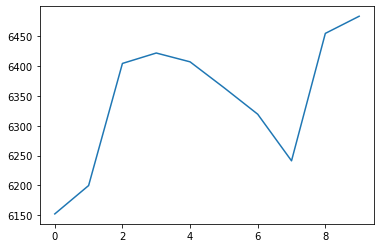

In [9]:
cnn_x, cnn_y, cnn_y_mean, buy_date_indexs = convertDf2CNNData(twii, 10,5,1,3)
print("buy_date_indexs: ", buy_date_indexs[-5:])

print("cnn_y.max(): ", cnn_y.max())
print("cnn_y.min(): ", cnn_y.min())
print("cnn_y.mean(): ", cnn_y.mean())

print("cnn_y_mean.max(): ", cnn_y_mean.max())
print("cnn_y_mean.min(): ", cnn_y_mean.min())
print("cnn_y_mean.mean(): ", cnn_y_mean.mean())


## Leamon Label Data Method1:
## by directly looking back n days of stock price, and then predict m days later in the future.

In [5]:
def labelDataWithHold(cnn_y):
    # Define Threshold
    upperBound = 1.01
    lowerBound = 0.99

    print(f"cnn_y[:10]: {cnn_y[:10]}")

    # Hold
    cond_hold = (cnn_y > lowerBound)&(cnn_y < upperBound)
    cnn_y_label = np.where(cond_hold, 0, cnn_y)
    print(f"cnn_y_label[:10]: {cnn_y_label[:10]}")

    # Up
    cond_up = cnn_y >= upperBound
    cnn_y_label = np.where(cond_up, 1, cnn_y_label)
    print(f"cnn_y_label[:10]: {cnn_y_label[:10]}")

    # Down
    cond_down = cnn_y <= lowerBound
    cnn_y_label = np.where(cond_down, 2, cnn_y_label)
    print(f"cnn_y_label[:10]: {cnn_y_label[:10]}")

    print(f"The number of cond_hold: {np.sum(cond_hold)}")
    print(f"The number of cond_up: {np.sum(cond_up)}")
    print(f"The number of cond_dwon: {np.sum(cond_down)}")

    # cnn_y_label = cnn_y_label.astype(int)
    # print(cnn_y_label.dtype)

    # np.savetxt("y_ori_dataset.csv", cnn_y, delimiter=",", fmt='%1.3f')
    # np.savetxt("y_label_dataset.csv", cnn_y_label, delimiter=",", fmt='%d')
    
    return cnn_y_label
    
def labelDataWithoutHold(cnn_y):
    
    print(cnn_y[:10])
    threshold = 1.02    # 漲超過2%才算漲，否則都算跌 
    
    # Up
    cond_up = cnn_y >= threshold
    cnn_y_label = np.where(cond_up, 1, cnn_y)
    print(cnn_y_label[:10])

    # Down
    cond_down = cnn_y < threshold
    cnn_y_label = np.where(cond_down, 2, cnn_y_label)
    print(cnn_y_label[:10])

    print(f"The number of cond_up: {np.sum(cond_up)}")
    print(f"The number of cond_dwon: {np.sum(cond_down)}")

    # cnn_y_label = cnn_y_label.astype(int)
    # print(cnn_y_label.dtype)

    # np.savetxt("y_ori_dataset.csv", cnn_y, delimiter=",", fmt='%1.3f')
    # np.savetxt("y_label_dataset.csv", cnn_y_label, delimiter=",", fmt='%d')
    return cnn_y_label
    

In [12]:
# labelDataWithoutHold(cnn_y)
print("*********************")
# labelDataWithoutHold(cnn_y_mean)

labelDataWithHold(cnn_y)
print("*********************")
labelDataWithHold(cnn_y_mean)

*********************
cnn_y[:10]: [0.96076844 0.9727701  0.99421701 0.94729863 0.97396973 1.05133557
 1.06147368 1.04054292 1.02633009 1.01734405]
cnn_y_label[:10]: [0.96076844 0.9727701  0.         0.94729863 0.97396973 1.05133557
 1.06147368 1.04054292 1.02633009 1.01734405]
cnn_y_label[:10]: [0.96076844 0.9727701  0.         0.94729863 0.97396973 1.
 1.         1.         1.         1.        ]
cnn_y_label[:10]: [2. 2. 0. 2. 2. 1. 1. 1. 1. 1.]
The number of cond_hold: 613
The number of cond_up: 732
The number of cond_dwon: 571
*********************
cnn_y[:10]: [0.97457992 0.97766717 1.00444838 0.96772641 0.96177281 1.03464185
 1.03344439 1.03181118 1.01213777 1.00963175]
cnn_y_label[:10]: [0.97457992 0.97766717 0.         0.96772641 0.96177281 1.03464185
 1.03344439 1.03181118 1.01213777 0.        ]
cnn_y_label[:10]: [0.97457992 0.97766717 0.         0.96772641 0.96177281 1.
 1.         1.         1.         0.        ]
cnn_y_label[:10]: [2. 2. 0. 2. 2. 1. 1. 1. 1. 0.]
The number of

array([2., 2., 0., ..., 0., 0., 0.])

## Leamon Label Data Method2: 
## by looking back n days of stock price, and see if price in the middle of sliding windows is suiting for selling, buying or holding.

In [ ]:
# import numpy as np
# import tqdm
# import multiprocessing
# import concurrent.futures
# import cnn_label_creator

# if __name__ == "__main__":
#     cpuUseRate = 1
#     cpuCount = int(multiprocessing.cpu_count() * cpuUseRate)
#     print("cpuCount: ", cpuCount)
#     with concurrent.futures.ProcessPoolExecutor(max_workers=cpuCount) as executor:
#         # pbar = tqdm.tqdm_notebook(total=12)
#         label_creator = cnn_label_creator.CNN_Label_Creator(twii_df, "台股指數", 360)
#         labels_y = executor.map(label_creator.fake_create_labels, [1,2,3,4,5,6,7,8,9,10,11,12])
#         print("concurrent.futures finished")
#     list(labels_y)

In [ ]:
import numpy as np
import tqdm
import multiprocessing
import concurrent.futures
import cnn_label_creator

def labelDataWithBuySellHold(df):
    cpuUseRate = 1
    cpuCount = int(multiprocessing.cpu_count() * cpuUseRate)
    print("cpuCount: ", cpuCount)

    stock_price_list = []
    totalNumsOfDatas = len(df)
    dividedNumOfDatas = int(totalNumsOfDatas / cpuCount)
    startIndex = 0
    finishIndex = 0

    print("totalNumsOfDatas: ", totalNumsOfDatas)
    for i in range(cpuCount):
        finishIndex += dividedNumOfDatas
        # print("startIndex: ", startIndex)
        # print("finishIndex: ", finishIndex)
        # print()

        if finishIndex > totalNumsOfDatas or (i == (cpuCount-1)):
            stock_price_list.append(df[startIndex:]['台股指數'])
            # print(f"startIndex: {startIndex} to the end")
        else:
            stock_price_list.append(df[startIndex:finishIndex]['台股指數'])
        startIndex = finishIndex

    with concurrent.futures.ProcessPoolExecutor(max_workers=cpuCount) as executor:
        label_creator = cnn_label_creator.CNN_Label_Creator(df, "台股指數", 11)
        labels_y = executor.map(label_creator.create_labels, stock_price_list)
        print("concurrent.futures finished")

    print("createLabels finished")
    labels_y = list(labels_y)
    np_labels_y = np.concatenate(labels_y)
    return np_labels_y


In [29]:

if __name__ == "__main__":
    cnn_labels_y = labelDataWithBuySellHold(twii_df)
    cond_hold = cnn_labels_y == 2
    cond_buy = cnn_labels_y == 1
    cond_sell = cnn_labels_y == 0

    print(f"The number of cond_hold: {np.sum(cond_hold)}")
    print(f"The number of cond_up: {np.sum(cond_buy)}")
    print(f"The number of cond_dwon: {np.sum(cond_sell)}")


75658
The number of cond_hold: 66337
The number of cond_up: 4587
The number of cond_dwon: 4614


## Save Plots

In [6]:
from matplotlib import image
import os,time
from pyts.image import  GramianAngularField

figure = plt.gcf() # get current figure
figure.set_size_inches(6, 4)

def saveCNNInputImage(cnn_x, cnn_y_label, buy_date_index, purpose, im_size, saveImage=False):
    save_path = f'.\\my_thesis\\dataset_{im_size}x{im_size}'
    save_raw_path = f'.\\my_thesis\\raw_data_{im_size}x{im_size}'
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    
    if not os.path.exists(save_raw_path):
        os.mkdir(save_raw_path)
    
    save_path = os.path.join(save_path, purpose)
    save_raw_path = os.path.join(save_raw_path, purpose)
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    
    if not os.path.exists(save_raw_path):
        os.mkdir(save_raw_path)
    
    gadf = GramianAngularField(image_size=im_size, method='difference')
    for i in tqdm.tqdm_notebook(range(len(cnn_x))):

        stockData = cnn_x[i].reshape(1,-1)
        GAF_gadf = gadf.fit_transform(stockData)
        im = GAF_gadf[0]
        
        y_label = int(cnn_y_label[i])
        className = "hold"
        if y_label == 1:
            className = "up"
        elif y_label == 2:
            className = "down"
        
        dirName = os.path.join(save_path, className)
        if not os.path.exists(dirName):
            os.mkdir(dirName)
        
        if saveImage:
            fileName = os.path.join(dirName, f'{i}.jpg')
            image.imsave(fileName, im, cmap='rainbow', origin='lower')
        else:
            fileName = os.path.join(dirName, f'{i}.npy')
            np.save(fileName, im)
        
        # Just for verify purpose start
        if i < 20:
        # if i >= 0:
            dirRawName = os.path.join(save_raw_path, className)
            if not os.path.exists(dirRawName):
                os.mkdir(dirRawName)
            fileRawName = os.path.join(dirRawName, f'{i}.jpg')
            
            plt.plot(cnn_x[i])
            # plt.ioff() # 為了不要顯示出來
            plt.savefig(fileRawName, dpi=100)
            plt.clf() # 清除上一張圖片
            # plt.close(figure)
        # Just for verify purpose end

    print(f"{purpose} Done")



<Figure size 432x288 with 0 Axes>

In [7]:
twii_df_train, twii_df_validation, twii_df_test = train_val_test_split(twii_df['台股指數'])
lst_twii_dfs = [twii_df_train, twii_df_validation, twii_df_test]
im_size = 20

for df, purpose in zip(lst_twii_dfs, ["train", "validation", "test"]):
    print(f"purpose {purpose} starts: ")
    cnn_x, cnn_y, cnn_y_mean, buy_date_index = convertDf2CNNData(df, 20,5,1,5)
    # print(f"cnn_y[0]: {cnn_y[0]}")
    
    cnn_y_label = labelDataWithHold(cnn_y)
    # cnn_y_label = labelDataWithHold(cnn_y_mean)
    # cnn_y_label = labelDataWithoutHold(cnn_y_mean)
    
    # print(f"cnn_y_label[:20]: {cnn_y_label[:20]}")
    # saveCNNInputImage(cnn_x, cnn_y_label, buy_date_index, purpose, im_size, False)
    saveCNNInputImage(cnn_x, cnn_y_label, buy_date_index, purpose, im_size, True)


twii_df.iloc[0]:  6152.43
twii_df.iloc[-1]:  16898.87

twii_df_train.iloc[0]:  6152.43
twii_df_train.iloc[-1]:  9736.73

twii_df_validation.iloc[0]:  9749.69
twii_df_validation.iloc[-1]:  11617.08

twii_df_test.iloc[0]:  11489.57
twii_df_test.iloc[-1]:  16898.87

train_start: 0, train_end: 4036, val_start:4036, val_end:5189, test_start:5189
len(twii_df_train):  4036
len(twii_df_validation):  1153
len(twii_df_test):  578
total number:  5767
purpose train starts: 


C:\Users\LEAMON~1\AppData\Local\Temp/ipykernel_10276/1267923627.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0, finish_point, sliding_movement)): # 因為sliding window如果每次只移動一小格，會造成很多看似一樣的圖，所以改每次移動四個sample point(1小時)。


  0%|          | 0/803 [00:00<?, ?it/s]

cnn_y[0]: 0.921605949197861
buy_date_indexs[0]: 1999-01-29 00:00:00
cnn_x.shape: (803, 20)
cnn_y.shape: (803,)
cnn_y_mean.shape: (803,)
buy_date_indexs.shape: (803,)
len(stockPrice_series): 4036
buy_date_indexs[0]: 1999-01-29 00:00:00
buy_date_indexs[-1]: 2015-03-11 00:00:00
cnn_y[:10]: [0.92160595 1.05133557 1.08236116 1.01883666 1.01452514 1.04169512
 1.02788339 0.99325893 1.03846109 1.0242686 ]
cnn_y_label[:10]: [0.92160595 1.05133557 1.08236116 1.01883666 1.01452514 1.04169512
 1.02788339 0.         1.03846109 1.0242686 ]
cnn_y_label[:10]: [0.92160595 1.         1.         1.         1.         1.
 1.         0.         1.         1.        ]
cnn_y_label[:10]: [2. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
The number of cond_hold: 237
The number of cond_up: 313
The number of cond_dwon: 253


C:\Users\LEAMON~1\AppData\Local\Temp/ipykernel_10276/3288304207.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(len(cnn_x))):


  0%|          | 0/803 [00:00<?, ?it/s]

train Done
purpose validation starts: 


C:\Users\LEAMON~1\AppData\Local\Temp/ipykernel_10276/1267923627.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0, finish_point, sliding_movement)): # 因為sliding window如果每次只移動一小格，會造成很多看似一樣的圖，所以改每次移動四個sample point(1小時)。


  0%|          | 0/226 [00:00<?, ?it/s]

cnn_y[0]: 1.0439942006835656
buy_date_indexs[0]: 2015-04-20 00:00:00
cnn_x.shape: (226, 20)
cnn_y.shape: (226,)
cnn_y_mean.shape: (226,)
buy_date_indexs.shape: (226,)
len(stockPrice_series): 1153
buy_date_indexs[0]: 2015-04-20 00:00:00
buy_date_indexs[-1]: 2019-11-18 00:00:00
cnn_y[:10]: [1.0439942  0.98465977 0.98580467 1.00372286 0.99512595 0.99429645
 0.9560663  1.00227484 1.02002978 0.99765039]
cnn_y_label[:10]: [1.0439942  0.98465977 0.98580467 0.         0.         0.
 0.9560663  0.         1.02002978 0.        ]
cnn_y_label[:10]: [1.         0.98465977 0.98580467 0.         0.         0.
 0.9560663  0.         1.         0.        ]
cnn_y_label[:10]: [1. 2. 2. 0. 0. 0. 2. 0. 1. 0.]
The number of cond_hold: 98
The number of cond_up: 72
The number of cond_dwon: 56


C:\Users\LEAMON~1\AppData\Local\Temp/ipykernel_10276/3288304207.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(len(cnn_x))):


  0%|          | 0/226 [00:00<?, ?it/s]

validation Done
purpose test starts: 


C:\Users\LEAMON~1\AppData\Local\Temp/ipykernel_10276/1267923627.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0, finish_point, sliding_movement)): # 因為sliding window如果每次只移動一小格，會造成很多看似一樣的圖，所以改每次移動四個sample point(1小時)。


  0%|          | 0/111 [00:00<?, ?it/s]

cnn_y[0]: 1.0091175659382001
buy_date_indexs[0]: 2019-12-26 00:00:00
cnn_x.shape: (111, 20)
cnn_y.shape: (111,)
cnn_y_mean.shape: (111,)
buy_date_indexs.shape: (111,)
len(stockPrice_series): 578
buy_date_indexs[0]: 2019-12-26 00:00:00
buy_date_indexs[-1]: 2022-04-06 00:00:00
cnn_y[:10]: [1.00911757 0.99291685 1.00545879 0.95580172 1.00935624 0.99870885
 0.99066442 0.9871857  0.95623379 0.84623477]
cnn_y_label[:10]: [0.         0.         0.         0.95580172 0.         0.
 0.         0.9871857  0.95623379 0.84623477]
cnn_y_label[:10]: [0.         0.         0.         0.95580172 0.         0.
 0.         0.9871857  0.95623379 0.84623477]
cnn_y_label[:10]: [0. 0. 0. 2. 0. 0. 0. 2. 2. 2.]
The number of cond_hold: 38
The number of cond_up: 45
The number of cond_dwon: 28


C:\Users\LEAMON~1\AppData\Local\Temp/ipykernel_10276/3288304207.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(len(cnn_x))):


  0%|          | 0/111 [00:00<?, ?it/s]

test Done


<Figure size 432x288 with 0 Axes>

## Reshape features and labels

In [ ]:
cnn_x = cnn_x.reshape(len(cnn_x), time_period, 1)
cnn_y = cnn_y.reshape(len(cnn_y), 1)

## Split traning and testing data

In [ ]:
import datetime
cnn_x_train = cnn_x[indexes < datetime.datetime(2016,1,1)]
cnn_y_train = cnn_y[indexes < datetime.datetime(2016,1,1)]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(cnn_x[0].reshape(1, len(cnn_x[0]))[0])
